In [1]:
import uuid

ID = str(uuid.uuid4())

print(ID)
# ID = 'b0d3f356-df5c-4b19-965b-663fcaa37f29'
# ID = 'dcf17a75-a664-4439-9f68-aeb89cb27821'

0ad2c7c8-0d89-42c6-bcb4-2ba62cf1ff95


In [2]:
from config import paths

DATASET_NAME = "les_miserables"
EDGE_WEIGHT = 30
EXPORT_DIR = (
    paths.get_project_root_path()
    .joinpath("data")
    .joinpath("experiments")
    .joinpath("initial_placement")
    .joinpath("kamada_kawai")
    .joinpath(ID)
)

N_INIT_POS = 10
NAME_ABBREVIATIONS = {
    "angular_resolution": "ANR",
    "aspect_ratio": "AR",
    "crossing_angle": "CA",
    "crossing_number": "CN",
    "gabriel_graph_property": "GB",
    "ideal_edge_lengths": "IE",
    "node_resolution": "NR",
    "run_time": "RT",
    "neighborhood_preservation": "NP",
    "stress": "ST",
}

THRESHOLD=0.0001
ITERATIONS = 50

In [3]:
from config import paths
from utils import graph

EXPORT_DIR.mkdir(parents=True, exist_ok=True)
dataset_path = paths.get_dataset_path(dataset_name=DATASET_NAME)
nx_graph = graph.load_nx_graph(
    dataset_name=DATASET_NAME, edge_weight=EDGE_WEIGHT
)


In [4]:
# random initial pos
import pandas as pd
import networkx as nx
from tqdm import tqdm
import uuid

method_name = "random"
export_path = EXPORT_DIR.joinpath(method_name).joinpath(f"{DATASET_NAME}.pkl")
export_path.parent.mkdir(parents=True, exist_ok=True)
df = pd.DataFrame()
for _ in tqdm(range(N_INIT_POS)):
    pos_id = str(uuid.uuid4())
    pos = nx.random_layout(nx_graph)
    df = pd.concat(
        [
            df,
            pd.DataFrame(
                [
                    {
                        "id": pos_id,
                        "pos": pos,
                        "method": method_name,
                        "dataset_name": DATASET_NAME,
                    }
                ]
            ),
        ]
    )

df.to_pickle(export_path)


100%|██████████| 10/10 [00:00<00:00, 808.67it/s]


In [5]:

# # random-kamada_kawai

# method_name = "random-kamada_kawai"
# export_path = EXPORT_DIR.joinpath(method_name).joinpath(
#     f"{DATASET_NAME}.pkl"
# )
# export_path.parent.mkdir(exist_ok=True, parents=True)
# data_df = pd.read_pickle(EXPORT_DIR.joinpath('random').joinpath(f"{DATASET_NAME}.pkl"))
# eg_graph, eg_indices = egraph_graph(nx_graph=nx_graph)
# eg_drawing = Coordinates.initial_placement(eg_graph)
# eg_distance_matrix = warshall_floyd(eg_graph, lambda _: EDGE_WEIGHT)
# kamada_kawai = KamadaKawai(eg_graph, lambda _: EDGE_WEIGHT)
# kamada_kawai.eps = 1e-3

# df = pd.DataFrame()
# for row in data_df.itertuples():
#     data_id = str(uuid.uuid4())

#     for u in row.pos:
#         eg_drawing.set_x(eg_indices[u], row.pos[u][0])
#         eg_drawing.set_y(eg_indices[u], row.pos[u][1])

#     kamada_kawai.run(eg_drawing)
#     pos = {
#         u: (eg_drawing.x(i), eg_drawing.y(i)) for u, i in eg_indices.items()
#     }
#     eg_crossings = crossing_edges(eg_graph, eg_drawing)

#     quality_metrics = measure_qualities(
#         target_qm_names=ALL_QM_NAMES,
#         eg_graph=eg_graph,
#         eg_drawing=eg_drawing,
#         eg_crossings=eg_crossings,
#         eg_distance_matrix=eg_distance_matrix,
#     )
#     quality_metrics["aspect_ratio"] *= -1
#     quality_metrics["neighborhood_preservation"] *= -1

#     df = pd.concat(
#         [
#             df,
#             pd.DataFrame(
#                 [
#                     {
#                         "id": data_id,
#                         "pos_id": row.id,
#                         "quality_metrics": quality_metrics,
#                         "pos": pos,
#                         "method": method_name,
#                         "dataset_name": DATASET_NAME,
#                     }
#                 ]
#             ),
#         ]
#     )

# df.to_pickle(export_path)


In [6]:
pos

{'Napoleon': array([0.4274252 , 0.41625768], dtype=float32),
 'Myriel': array([0.00070785, 0.21945675], dtype=float32),
 'MlleBaptistine': array([0.42904156, 0.55615884], dtype=float32),
 'MmeMagloire': array([0.53180385, 0.16314772], dtype=float32),
 'CountessDeLo': array([0.25234556, 0.20225199], dtype=float32),
 'Geborand': array([0.59304065, 0.94410956], dtype=float32),
 'Champtercier': array([0.49514776, 0.38353267], dtype=float32),
 'Cravatte': array([0.9076928, 0.7886783], dtype=float32),
 'Count': array([0.89334375, 0.07449405], dtype=float32),
 'OldMan': array([0.1262676 , 0.89924735], dtype=float32),
 'Valjean': array([0.08841916, 0.59492785], dtype=float32),
 'Labarre': array([0.85760254, 0.08458734], dtype=float32),
 'Marguerite': array([0.36732727, 0.49203503], dtype=float32),
 'MmeDeR': array([0.57479596, 0.6354239 ], dtype=float32),
 'Isabeau': array([0.16432369, 0.5316285 ], dtype=float32),
 'Gervais': array([0.9197905, 0.5097774], dtype=float32),
 'Listolier': array([0

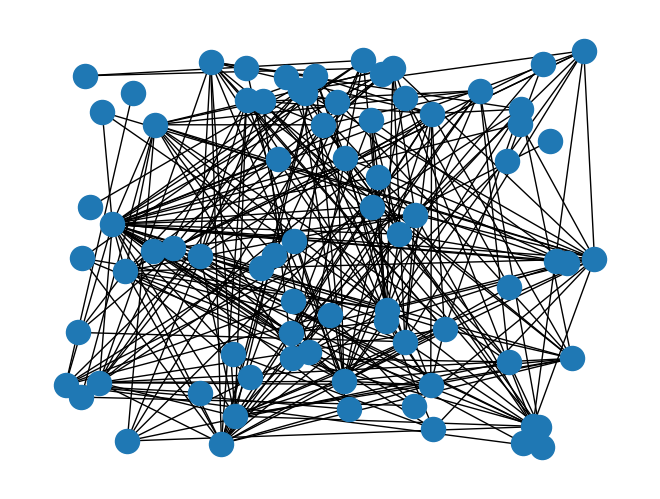

In [7]:
nx.draw(nx_graph, pos=pos)

In [8]:
# random-fruchterman_reingold
print('hello')
from utils.quality_metrics import measure_qualities
from config.quality_metrics import ALL_QM_NAMES
from generators.graph import egraph_graph
from egraph import (
    KamadaKawai,
    Coordinates,
    warshall_floyd,
    crossing_edges,
)

method_name = "random-fruchterman_reingold"
export_path = EXPORT_DIR.joinpath(method_name).joinpath(f"{DATASET_NAME}.pkl")
export_path.parent.mkdir(exist_ok=True, parents=True)
data_df = pd.read_pickle(EXPORT_DIR.joinpath('random').joinpath(f"{DATASET_NAME}.pkl"))
eg_graph, eg_indices = egraph_graph(nx_graph=nx_graph)
eg_drawing = Coordinates.initial_placement(eg_graph)
eg_distance_matrix = warshall_floyd(eg_graph, lambda _: EDGE_WEIGHT)
data = []
df = pd.DataFrame()
for row in tqdm(data_df.itertuples()):
    data_id = str(uuid.uuid4())
    pos = nx.spring_layout(nx_graph, pos=row.pos, threshold=THRESHOLD, iterations=ITERATIONS, scale=EDGE_WEIGHT**2, weight=None)
    for u in pos:
        eg_drawing.set_x(eg_indices[u], pos[u][0])
        eg_drawing.set_y(eg_indices[u], pos[u][1])

    eg_crossings = crossing_edges(eg_graph, eg_drawing)
    quality_metrics = measure_qualities(
        target_qm_names=ALL_QM_NAMES,
        eg_graph=eg_graph,
        eg_drawing=eg_drawing,
        eg_crossings=eg_crossings,
        eg_distance_matrix=eg_distance_matrix,
    )
    quality_metrics["aspect_ratio"] *= -1
    quality_metrics["neighborhood_preservation"] *= -1

    df = pd.concat(
        [
            df,
            pd.DataFrame(
                [
                    {
                        "id": data_id,
                        "pos_id": row.id,
                        "quality_metrics": quality_metrics,
                        "pos": pos,
                        "method": method_name,
                        "dataset_name": DATASET_NAME,
                    }
                ]
            ),
        ]
    )

df.to_pickle(export_path)


hello


10it [00:00, 34.95it/s]


In [9]:
pos

{'Napoleon': array([-799.96630557, -594.02149998]),
 'Myriel': array([-577.18650912, -480.78364658]),
 'MlleBaptistine': array([-395.31565549, -286.89633103]),
 'MmeMagloire': array([-353.02215047, -332.27284507]),
 'CountessDeLo': array([-829.23724088, -686.64325399]),
 'Geborand': array([-862.19953514, -482.97772235]),
 'Champtercier': array([-731.28558468, -680.06489357]),
 'Cravatte': array([-635.61393148, -761.34120478]),
 'Count': array([-732.49335616, -761.93770637]),
 'OldMan': array([-882.08094976, -577.13542367]),
 'Valjean': array([-51.71279985, -51.06978794]),
 'Labarre': array([-162.49224914, -340.49396003]),
 'Marguerite': array([-151.16741183, -267.17422776]),
 'MmeDeR': array([-362.61831878, -128.29778296]),
 'Isabeau': array([-299.04583639, -193.57840743]),
 'Gervais': array([  58.44614075, -345.77801875]),
 'Listolier': array([  45.36905552, -520.44536322]),
 'Tholomyes': array([  87.9955466 , -265.99035547]),
 'Fameuil': array([ 176.54714075, -477.02356787]),
 'Blach

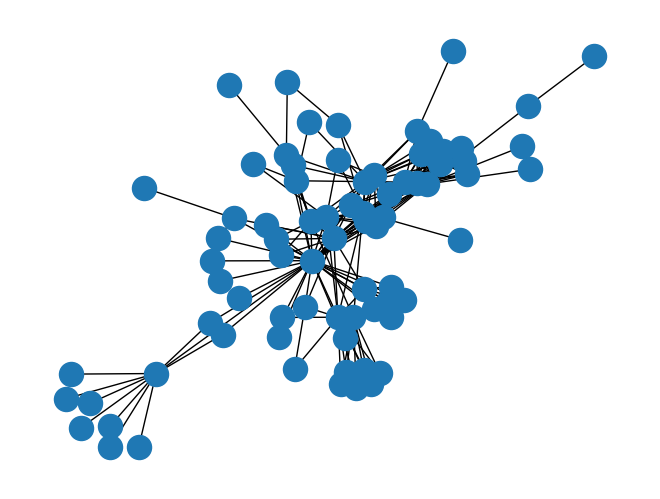

In [10]:
nx.draw(nx_graph, pos=pos)

In [11]:
print('hello')
from utils.quality_metrics import measure_qualities
from config.quality_metrics import ALL_QM_NAMES
from generators.graph import egraph_graph
from egraph import (
    KamadaKawai,
    Coordinates,
    warshall_floyd,
    crossing_edges,
)
print('hello')
method_name = "random-kamada_kawai"
export_path = EXPORT_DIR.joinpath(method_name).joinpath(
    f"{DATASET_NAME}.pkl"
)
export_path.parent.mkdir(exist_ok=True, parents=True)
# data_df = pd.read_pickle(EXPORT_DIR.joinpath('random').joinpath(f"{DATASET_NAME}.pkl"))
kamada_kawai = KamadaKawai(eg_graph, lambda _: EDGE_WEIGHT)

data = []
for row in tqdm(data_df.itertuples()):
    print('d')
    data_id = str(uuid.uuid4())
    print(data_id)
    for u in row.pos:
        eg_drawing.set_x(eg_indices[u], row.pos[u][0])
        eg_drawing.set_y(eg_indices[u], row.pos[u][1])

    kamada_kawai.eps = 1e-3
    kamada_kawai.run(eg_drawing)
    # 似たスケールにするためにとりあえず
    pos = {
        u: (eg_drawing.x(i), eg_drawing.y(i)) for u, i in eg_indices.items()
    }
    eg_crossings = crossing_edges(eg_graph, eg_drawing)

    quality_metrics = measure_qualities(
        target_qm_names=ALL_QM_NAMES,
        eg_graph=eg_graph,
        eg_drawing=eg_drawing,
        eg_crossings=eg_crossings,
        eg_distance_matrix=eg_distance_matrix,
    )

    data.append({
                        "id": data_id,
                        "pos_id": row.id,
                        "quality_metrics": quality_metrics,
                        "pos": pos,
                        "method": method_name,
                        "dataset_name": DATASET_NAME,
                    })

df = pd.DataFrame(data)
df.to_pickle(export_path)


hello
hello


4it [00:00, 16.79it/s]

d
55aa89d3-9ad5-48f8-b7a0-227b8619d139
d
f3e0c789-777b-4599-aca9-e1776c1023cd
d
0dbba1b0-6ed4-436d-ada8-35c271a278c7
d
88d45ccd-ad07-4218-b2d3-b3a868cf7d52


6it [00:00, 17.63it/s]

d
7fb79d0a-134a-49a0-9f9d-93dc1efe6453
d
2ef18198-518a-4194-a033-5aba4592f8c6


10it [00:00, 18.47it/s]

d
95ce7d78-ed1e-494b-bbf4-22c8695736b0
d
4b6105ad-5f7d-4228-ad00-e0a27441ddcf
d
07a124ec-542e-4ad7-bd1e-cf8cbcd1f945
d
b6dac749-a102-4589-adec-7976d55935c4


In [12]:
pos

{'Napoleon': (54.595733642578125, -48.8207893371582),
 'Myriel': (15.238550186157227, -33.629764556884766),
 'MlleBaptistine': (-3.1886096000671387, -23.114151000976562),
 'MmeMagloire': (7.640237331390381, -20.301387786865234),
 'CountessDeLo': (44.32659149169922, -56.42885208129883),
 'Geborand': (18.558452606201172, -65.52072143554688),
 'Champtercier': (4.542011260986328, -65.52734375),
 'Cravatte': (-8.086844444274902, -62.70066833496094),
 'Count': (31.917373657226562, -62.386138916015625),
 'OldMan': (-19.756343841552734, -57.52170944213867),
 'Valjean': (12.244359016418457, 13.423771858215332),
 'Labarre': (-16.743053436279297, -10.050010681152344),
 'Marguerite': (49.71818542480469, 24.62157440185547),
 'MmeDeR': (15.207330703735352, -18.725849151611328),
 'Isabeau': (52.33148193359375, 3.9006171226501465),
 'Gervais': (-5.431065559387207, -12.363810539245605),
 'Listolier': (63.99696350097656, 56.06339645385742),
 'Tholomyes': (26.9835262298584, 69.0448226928711),
 'Fameuil':

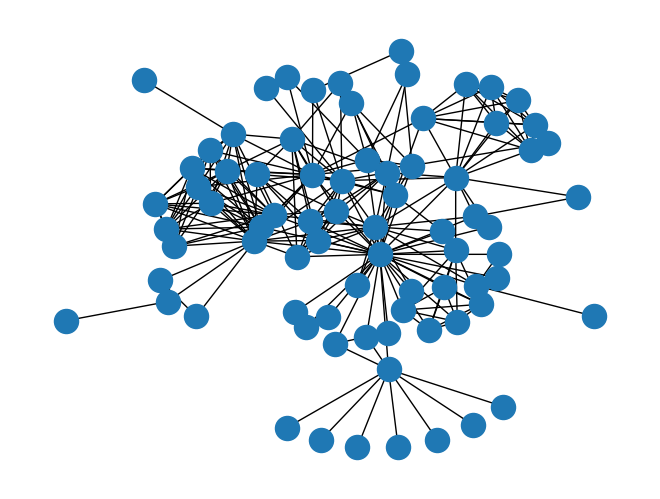

In [13]:
nx.draw(nx_graph, pos=pos)


In [14]:
# random-kamada_kawai-fruchterman_reingold
from egraph import (
    Coordinates,
    warshall_floyd,
    crossing_edges,
)

method_name = "random-kamada_kawai-fruchterman_reingold"
export_path = EXPORT_DIR.joinpath(method_name).joinpath(f"{DATASET_NAME}.pkl")
export_path.parent.mkdir(exist_ok=True, parents=True)
data_df = pd.read_pickle(
    EXPORT_DIR.joinpath("random-kamada_kawai").joinpath(f"{DATASET_NAME}.pkl")
)
eg_graph, eg_indices = egraph_graph(nx_graph=nx_graph)
eg_drawing = Coordinates.initial_placement(eg_graph)
eg_distance_matrix = warshall_floyd(eg_graph, lambda _: EDGE_WEIGHT)

df = pd.DataFrame()
for row in data_df.itertuples():
    data_id = str(uuid.uuid4())
    pos = nx.spring_layout(
        nx_graph,
        pos=row.pos,
        threshold=THRESHOLD,
        iterations=ITERATIONS,
        scale=EDGE_WEIGHT ** 2,
        weight=None,
        k=EDGE_WEIGHT,
    )
    for u in pos:
        eg_drawing.set_x(eg_indices[u], pos[u][0])
        eg_drawing.set_y(eg_indices[u], pos[u][1])

    eg_crossings = crossing_edges(eg_graph, eg_drawing)
    quality_metrics = measure_qualities(
        target_qm_names=ALL_QM_NAMES,
        eg_graph=eg_graph,
        eg_drawing=eg_drawing,
        eg_crossings=eg_crossings,
        eg_distance_matrix=eg_distance_matrix,
    )
    quality_metrics["aspect_ratio"] *= -1
    quality_metrics["neighborhood_preservation"] *= -1

    df = pd.concat(
        [
            df,
            pd.DataFrame(
                [
                    {
                        "id": data_id,
                        "pos_id": row.id,
                        "quality_metrics": quality_metrics,
                        "pos": pos,
                        "method": method_name,
                        "dataset_name": DATASET_NAME,
                    }
                ]
            ),
        ]
    )

df.to_pickle(export_path)


In [15]:
pos

{'Napoleon': array([ 281.76560833, -805.37029716]),
 'Myriel': array([ 108.35278519, -632.17534446]),
 'MlleBaptistine': array([  62.46190884, -416.10727484]),
 'MmeMagloire': array([ 116.26617963, -413.06052024]),
 'CountessDeLo': array([ 204.69498115, -813.66594474]),
 'Geborand': array([ 133.33352071, -865.42303542]),
 'Champtercier': array([  72.64163046, -900.        ]),
 'Cravatte': array([  40.42136864, -837.52210883]),
 'Count': array([ 207.23459859, -884.67380943]),
 'OldMan': array([ -29.45803358, -834.12139588]),
 'Valjean': array([ 62.44422279, -67.73334904]),
 'Labarre': array([-114.04566813, -258.1191895 ]),
 'Marguerite': array([304.8591383,  46.6087549]),
 'MmeDeR': array([  80.76074641, -299.73757071]),
 'Isabeau': array([ 180.38152242, -315.51691102]),
 'Gervais': array([ 2.36004345e-01, -3.02596252e+02]),
 'Listolier': array([382.73087629, 359.90005433]),
 'Tholomyes': array([237.74885802, 341.54263125]),
 'Fameuil': array([427.60592179, 392.19926735]),
 'Blacheville

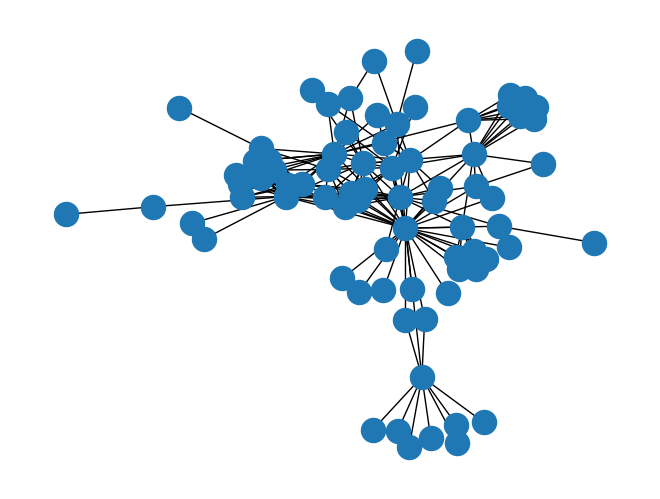

In [16]:
nx.draw(nx_graph, pos=pos)

In [17]:
import plotly.express as px


method_name = "random-kamada_kawai"
export_dir = EXPORT_DIR.joinpath(method_name)
data_df = pd.read_pickle(export_dir.joinpath(f"{DATASET_NAME}.pkl"))
df = pd.DataFrame()
for row in data_df.itertuples():
    quality_metrics = {}
    for qm_name in row.quality_metrics:
        quality_metrics[NAME_ABBREVIATIONS[qm_name]] = row.quality_metrics[
            qm_name
        ]
    df = pd.concat(
        [df, pd.DataFrame([{**quality_metrics, "method_name": method_name}])]
    )

method_name = "random-fruchterman_reingold"
export_dir = EXPORT_DIR.joinpath(method_name)
data_df = pd.read_pickle(export_dir.joinpath(f"{DATASET_NAME}.pkl"))
df = pd.DataFrame()
for row in data_df.itertuples():
    quality_metrics = {}
    for qm_name in row.quality_metrics:
        quality_metrics[NAME_ABBREVIATIONS[qm_name]] = row.quality_metrics[
            qm_name
        ]
    df = pd.concat(
        [df, pd.DataFrame([{**quality_metrics, "method_name": method_name}])]
    )


method_name = "random-kamada_kawai-fruchterman_reingold"
export_dir = EXPORT_DIR.joinpath(method_name)
data_df = pd.read_pickle(export_dir.joinpath(f"{DATASET_NAME}.pkl"))
for row in data_df.itertuples():
    quality_metrics = {}
    for qm_name in row.quality_metrics:
        quality_metrics[NAME_ABBREVIATIONS[qm_name]] = row.quality_metrics[
            qm_name
        ]
    df = pd.concat(
        [df, pd.DataFrame([{**quality_metrics, "method_name": method_name}])]
    )


fig = px.scatter_matrix(
    df,
    title=f"{DATASET_NAME} {method_name}",
    dimensions=[NAME_ABBREVIATIONS[qm_name] for qm_name in ALL_QM_NAMES],
    color="method_name",
)
fig.update_traces(marker=dict(size=2))
fig.update_layout(
    margin=dict(t=30, r=20, b=10),
)
fig.show()


In [18]:
import matplotlib.pyplot as plt
from PIL import Image


def get_concat_h(im1, im2):
    dst = Image.new("RGB", (im1.width + im2.width, im1.height), "black")
    dst.paste(im1, (0, 0))
    dst.paste(im2, (im1.width, 0))
    return dst


def get_concat_v(im1, im2):
    dst = Image.new("RGB", (im1.width, im1.height + im2.height))
    dst.paste(im1, (0, 0))
    dst.paste(im2, (0, im1.height))
    return dst


EXPORT_DIR.joinpath("images").mkdir(parents=True, exist_ok=True)

boxplot_data = {}
for qm_name in ALL_QM_NAMES:
    boxplot_data[NAME_ABBREVIATIONS[qm_name]] = {
        "random-fruchterman_reingold": [],
        "random-kamada_kawai-fruchterman_reingold": [],
    }

for _, row in df.iterrows():
    row_dict = row.to_dict()
    quality_metrics = {}
    for qm_name in ALL_QM_NAMES:
        boxplot_data[NAME_ABBREVIATIONS[qm_name]][
            row_dict["method_name"]
        ].append(row_dict[NAME_ABBREVIATIONS[qm_name]])
for qm_name in ALL_QM_NAMES:
    bins = [
        boxplot_data[NAME_ABBREVIATIONS[qm_name]][method_name]
        for method_name in [
            "random-fruchterman_reingold",
            "random-kamada_kawai-fruchterman_reingold",
        ]
    ]
    plt.figure(figsize=(3, 2))
    plt.subplots_adjust(left=0.3, top=0.8, bottom=0.2)
    plt.tick_params(axis="x", labelsize=18)
    plt.tick_params(axis="y", labelsize=14)
    plt.title(
        f"{NAME_ABBREVIATIONS[qm_name]}",
        fontsize=18,
    )
    plt.boxplot(
        bins,
        labels=[
            "r-fr",
            "r-kk-fr",
        ],
        widths=0.4,
    )
    plt.savefig(
        EXPORT_DIR.joinpath("images").joinpath(
            f"{DATASET_NAME}-{qm_name}.png"
        ),
        format="png",
        dpi=300,
        facecolor="white",
    )
    plt.close()

dst_export_path = EXPORT_DIR.joinpath("images").joinpath(f"{DATASET_NAME}.png")

images = []
tmp = []

for qm_name in ALL_QM_NAMES:
    image_path = EXPORT_DIR.joinpath("images").joinpath(
        f"{DATASET_NAME}-{qm_name}.png"
    )
    image_path.parent.mkdir(exist_ok=True, parents=True)
    img = Image.open(image_path)

    tmp.append({"image": img})

    if len(tmp) == 3:
        images.append(tmp)
        tmp = []

dst = None
for v in images:
    h_dst = None
    for h in v:
        if h_dst is None:
            h_dst = h["image"]
            continue
        h_dst = get_concat_h(h_dst, h["image"])
    if dst is None:
        dst = h_dst
        continue
    dst = get_concat_v(dst, h_dst)

dst.save(dst_export_path)


edge weightが効いていないんじゃない？
SSの論文にある他のeta(ラーニングレート)
- 元の論文を読んで
ピボットの選び方
平均的に特定の評価指標をよくするパラメータの選び方ができるかどうか？
- 最適化できている以上何かしらの理由があって、良い評価指標を得ている

パラメータを入れたらどれくらいの評価指標になるっていう回帰モデルがあれば、説明になる
- パラメータと評価指標の関係を知らないと説明ができない
- 最適化できた以上、いいパラメータが存在する
- NNを使って非線形回帰モデルを作ろう

先にパラメータと評価指標の関係を調べる。
いい結果が出るパラメータが全くわかってないので、わかるようになろう
